In [19]:
import os
import pandas as pd
df2=pd.read_csv('../dataset/mp_all_v4.csv')
import ast

def format_oxidation_state(s):
    try:
        d = ast.literal_eval(s)
        if isinstance(d, dict) and d:
            return {f"{k}:{v}" for k, v in d.items()}
        else:
            return set()
    except:
        return set()

df2['ox_state'] = df2['ox_state'].apply(format_oxidation_state)

In [27]:
from collections import defaultdict

new_df = df2[df2["polymorphs"] == 1]

formulas_dict = defaultdict(set)

for i in range(len(new_df)):
    rd_formula = new_df["reduced_formula"].iloc[i]
    try:
        os_set = new_df["ox_state"].iloc[i]
        if not os_set or os_set == "{}":
            continue
        os_string = ", ".join(sorted(os_set))  # Normalize to consistent string
        formulas_dict[rd_formula].add(os_string)
    except:
        continue

formulas_cnt = {k: len(v) for k, v in formulas_dict.items()}


In [29]:
formulas_dict

defaultdict(set,
            {'GaTe': {'Ga:2.0, Te:-2.0'},
             'Zn(InSe2)2': {'In:3.0, Se:-2.0, Zn:2.0'},
             'Y2MgS4': {'Mg:2.0, S:-2.0, Y:3.0'},
             'Mn3N2': {'Mn:2.0, N:-3.0'},
             'TaS2': {'S:-2.0, Ta:4.0'},
             'SiOs': {'Os:4.0, Si:-4.0'},
             'CaFeO3': {'Ca:2.0, Fe:4.0, O:-2.0'},
             'PrBi': {'Bi:-3.0, Pr:3.0'},
             'LuCuS2': {'Cu:1.0, Lu:3.0, S:-2.0'},
             'LiSnS2': {'Li:1.0, S:-2.0, Sn:3.0'},
             'LiTiS2': {'Li:1.0, S:-2.0, Ti:3.0'},
             'IrC': {'C:-4.0, Ir:4.0'},
             'WN': {'N:-3.0, W:3.0'},
             'HfN': {'Hf:2.0, N:-2.0', 'Hf:3.0, N:-3.0'},
             'LiB': {'B:-1.0, Li:1.0'},
             'HoP': {'Ho:3.0, P:-3.0'},
             'ScC': {'C:-2.0, Sc:2.0', 'C:-3.0, Sc:3.0'},
             'SnS2': {'S:-2.0, Sn:4.0'},
             'HfC': {'C:-4.0, Hf:4.0'},
             'GeC': {'C:-3.0, Ge:3.0', 'C:-4.0, Ge:4.0'},
             'SiC': {'C:-4.0, Si:4.0'},
           

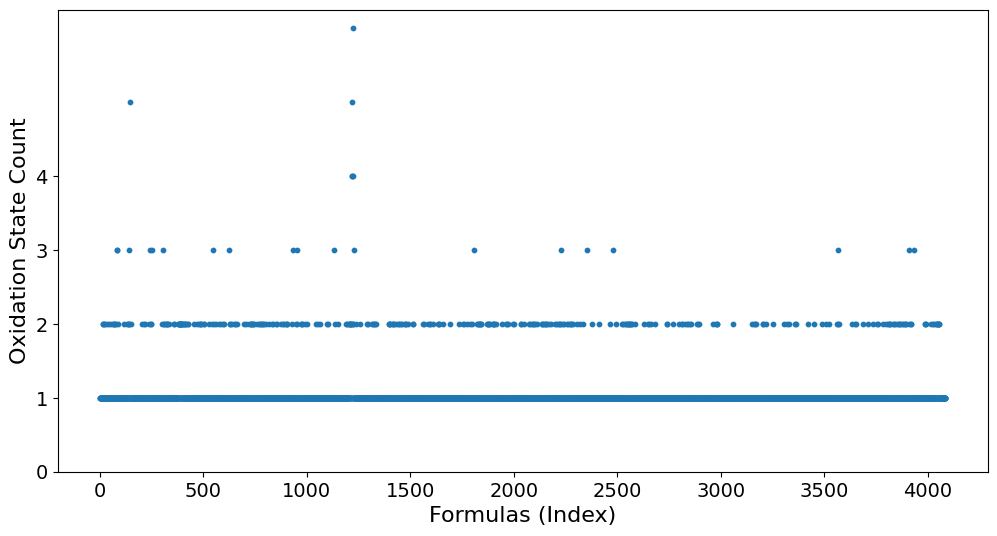

In [33]:
import matplotlib.pyplot as plt

formulas = list(formulas_cnt.keys())
counts = list(formulas_cnt.values())
indices = range(len(formulas))

# fig,ax = plt.figure(figsize=(12, 6))

fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(indices, counts, s=10)
ax.set_yticks([0,1,2, 3, 4])
ax.set_xlabel("Formulas (Index)", fontsize=16)
ax.set_ylabel("Oxidation State Count", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.savefig("os_distribution.pdf", dpi=300)
plt.show()

In [12]:
# cnt1 = 0
# cnt2 = 0
# cnt3 = 0
# cnt = 0
# for kk in formulas_cnt:
#     if formulas_cnt[kk] == 1:
#         cnt1 += 1
#     elif formulas_cnt[kk] == 2:
#         cnt2 += 1
#     elif formulas_cnt[kk] == 3:
#         cnt3 += 1
#     else:
#         cnt += 1

In [35]:
# cnt1, cnt2, cnt3, cnt

In [37]:
cnt1 = sum(1 for v in formulas_cnt.values() if v == 1)
cnt2 = sum(1 for v in formulas_cnt.values() if v == 2)
cnt3 = sum(1 for v in formulas_cnt.values() if v == 3)
cnt4_or_more = sum(1 for v in formulas_cnt.values() if v >= 4)

print("Oxidation state count == 1:", cnt1)
print("Oxidation state count == 2:", cnt2)
print("Oxidation state count == 3:", cnt3)
print("Oxidation state count >= 4:", cnt4_or_more)


Oxidation state count == 1: 3725
Oxidation state count == 2: 337
Oxidation state count == 3: 19
Oxidation state count >= 4: 6
